In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\mahes\Downloads\Advertising Budget and Sales.csv")




In [2]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.


In [3]:
print(df.head())

   Unnamed: 0  TV Ad Budget ($)  Radio Ad Budget ($)  Newspaper Ad Budget ($)  \
0           1             230.1                 37.8                     69.2   
1           2              44.5                 39.3                     45.1   
2           3              17.2                 45.9                     69.3   
3           4             151.5                 41.3                     58.5   
4           5             180.8                 10.8                     58.4   

   Sales ($)  
0       22.1  
1       10.4  
2        9.3  
3       18.5  
4       12.9  


In [4]:
df.rename(columns = 
         {"TV Ad Budget ($)" : "TV",
         "Radio Ad Budget ($)" : "Radio",
          "Newspaper Ad Budget ($)" : "Newspaper",
          "Sales ($)" : "Sales" }, inplace = True)

In [5]:
df["total"] = df["TV"] + df["Radio"] + df["Newspaper"]

In [6]:
print(df.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales  total
0           1  230.1   37.8       69.2   22.1  337.1
1           2   44.5   39.3       45.1   10.4  128.9
2           3   17.2   45.9       69.3    9.3  132.4
3           4  151.5   41.3       58.5   18.5  251.3
4           5  180.8   10.8       58.4   12.9  250.0


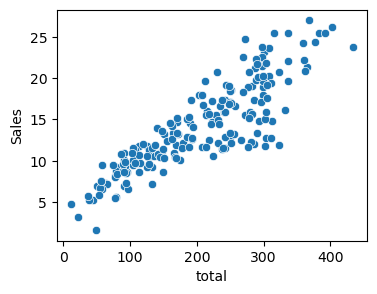

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (4,3))
sns.scatterplot(x = "total", y = "Sales", data=df)
plt.show()

In [8]:
df[['TV','Sales']].corr()

,TV,Sales
TV,1.000000,0.782224
Sales,0.782224,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

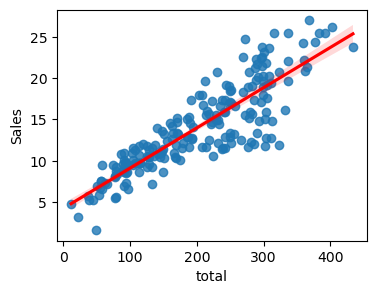

In [9]:
plt.figure(figsize=(4,3))
sns.regplot(data = df, x= 'total', y= 'Sales', line_kws={'color': 'red'})
plt.show

In [10]:
X = df["total"]
y = df["Sales"]

In [11]:
import numpy as np
np.polyfit(X,y,1)

array([0.04868788, 4.24302822])

In [12]:
total_spend = 500

sales_pred = 0.05*total_spend + 4.24
sales_pred

29.240000000000002

In [13]:
sale_pred = 0.05*X + 4.24
error = y-sale_pred
mae = np.abs(error).sum()/len(df)
mae

1.943075

In [14]:
#MEAN SQUARE ERROR
mse = ((error)**2).sum()/len(df)
mse

6.7749046250000005

In [15]:
## Business Objective 


#Is there relationsip between adertising expenditure and sales. If yes, develop a model to predict future 
#sales based on adertising spend. 
#What should be the expected sales when our planned adertising budget is $4000.

In [16]:
X = df[["total"]]
X

# split the data into training and test sample 

from sklearn.model_selection import train_test_split

In [17]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.

    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.

    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        com

In [18]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
X_test

,total
95,247.8
15,296.0
30,364.4
158,93.8
128,272.5
...,...
97,227.9
31,168.9
12,124.8
35,303.3


In [20]:
from sklearn.linear_model import LinearRegression 

In [21]:
model = LinearRegression() # Creating instance

In [22]:
# Fit the model  (training set)

model.fit(X_train, y_train)

LinearRegression()

In [23]:
model.intercept_,model.coef_

(4.144617419300378, array([0.04964203]))

In [24]:
y_pred = model.predict(X_test)

In [25]:
X_test, y_pred

(     total
 95   247.8
 15   296.0
 30   364.4
 158   93.8
 128  272.5
 ..     ...
 97   227.9
 31   168.9
 12   124.8
 35   303.3
 119   57.7
 
 [66 rows x 1 columns],
 array([16.44591186, 18.83865759, 22.23417228,  8.80103961, 17.67206994,
        12.22633951, 18.43655717,  8.11597963, 16.00409781, 15.51760594,
         7.03874763,  8.69182715, 20.16409973,  6.36361605, 12.49440646,
        14.7282977 ,  7.95712514, 15.81545811, 10.50376116, 17.84085283,
        20.82433869, 14.98643625,  8.62232831, 22.00085475,  8.07626601,
         7.96208934, 18.55569803, 12.28590995, 10.34490667,  6.01612186,
        15.24457479,  9.5059564 , 19.44925453, 11.59092156, 20.60591377,
        17.93517269,  9.29745988, 22.12992402, 10.96046781,  6.61679039,
        11.43206707, 13.71063614,  9.35206611,  8.77125439, 16.1579881 ,
         6.90967836, 10.46901174, 13.59149527, 11.32781881, 10.09173233,
        12.06252082, 13.49221122, 10.72715028,  8.9747867 ,  8.71168396,
        12.40505081,  9.272

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

In [27]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mae: {mae}\nmse: {mse}\nrmse: {rmse}\nr2 score: {r2}")

mae: 1.9323573630411937
mse: 6.759105254397875
rmse: 2.5998279278440477
r2 score: 0.7381101742365419


In [28]:
!pip install statsmodels

In [29]:
import statsmodels.api as sm

In [30]:
model_ols = sm.OLS(y,X).fit()
print(model_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              4318.
Date:                Fri, 20 Jun 2025   Prob (F-statistic):                   6.95e-137
Time:                        10:16:51   Log-Likelihood:                         -512.60
No. Observations:                 200   AIC:                                      1027.
Df Residuals:                     199   BIC:                                      1030.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [63]:
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              4318.
Date:                Fri, 20 Jun 2025   Prob (F-statistic):                   6.95e-137
Time:                        10:17:01   Log-Likelihood:                         -512.60
No. Observations:                 200   AIC:                                      1027.
Df Residuals:                     199   BIC:                                      1030.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
total          0.0661      0.001     65.710      0.000       0.064       0.068
==============================================================================
Omnibus:                       24.163   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.970
Skew:                          -0.900   Prob(JB):                     5.12e-07
Kurtosis:                       3.487   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""